In [21]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords, words
from nltk import word_tokenize
import re
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
from matplotlib import rc

In [3]:
#Function to flatten 
flatten = lambda l: [item for sublist in l for item in sublist]

In [4]:
url = "https://raw.githubusercontent.com/LunaHub/Friends_social_data_analysis_2019/master/data/All_Friends_data.csv"
df = pd.read_csv(url, error_bad_lines=False)

In [5]:
df = df.drop("Unnamed: 0",axis=1)

In [6]:
mainch = ["joey","rachel","ross","chandler","monica","phoebe"]

In [7]:
# function for clearing lines
def cleanLines(line):
    #Exclude links
    line = re.sub(r'\([^)]*\)','',line)
    #Remove everything besides letters
    line = re.sub("([^a-z \t])|(\w+:\/\/\S+)", "", line)
    #Create a string for tweet
    line = [''.join(s for s in line)]
    return(line) 

In [8]:
#Find episodes  of each season
s1 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(1[0-2][1-9])')].reset_index(drop=True)
s2 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(2[0-2][1-9])')].reset_index(drop=True)
s3 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(3[0-2][1-9])')].reset_index(drop=True)
s4 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(4[0-2][1-9])')].reset_index(drop=True)
s5 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(5[0-2][1-9])')].reset_index(drop=True)
s6 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(6[0-2][1-9])')].reset_index(drop=True)
s7 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(7[0-2][1-9])')].reset_index(drop=True)
s8 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(8[0-2][1-9])')].reset_index(drop=True)
s9 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(9[0-2][1-9])')].reset_index(drop=True)
s10 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(10[0-2][1-9])')].reset_index(drop=True)

In [9]:
#Create list for what characters says in season 1. liness1[0] is what joey says, liness1[5] is phoebe
liness1 = []
for character in mainch:
    says = s1.Text[[character in i for i in s1.Speaker.str.split("\b")]].reset_index(drop=True)
    liness1.append(says)

liness2 = []
for character in mainch:
    says = s2.Text[[character in i for i in s2.Speaker.str.split("\b")]].reset_index(drop=True)
    liness2.append(says)
    
liness3 = []
for character in mainch:
    says = s3.Text[[character in i for i in s3.Speaker.str.split("\b")]].reset_index(drop=True)
    liness3.append(says)

liness4 = []
for character in mainch:
    says = s4.Text[[character in i for i in s4.Speaker.str.split("\b")]].reset_index(drop=True)
    liness4.append(says)

liness5 = []
for character in mainch:
    says = s5.Text[[character in i for i in s5.Speaker.str.split("\b")]].reset_index(drop=True)
    liness5.append(says)

liness6 = []
for character in mainch:
    says = s6.Text[[character in i for i in s6.Speaker.str.split("\b")]].reset_index(drop=True)
    liness6.append(says)
    
liness7 = []
for character in mainch:
    says = s7.Text[[character in i for i in s7.Speaker.str.split("\b")]].reset_index(drop=True)
    liness7.append(says)

liness8 = []
for character in mainch:
    says = s8.Text[[character in i for i in s8.Speaker.str.split("\b")]].reset_index(drop=True)
    liness8.append(says)
    
liness9 = []
for character in mainch:
    says = s9.Text[[character in i for i in s9.Speaker.str.split("\b")]].reset_index(drop=True)
    liness9.append(says)

liness10 = []
for character in mainch:
    says = s10.Text[[character in i for i in s10.Speaker.str.split("\b")]].reset_index(drop=True)
    liness10.append(says)
    

In [10]:
seasons = ["Season 1","Season 2","Season 3","Season 4","Season 5","Season 6","Season 7","Season 8","Season 9","Season 10","All in total"]

In [10]:
n = 0
joeylines = []
joeylines.append(liness1[n])
joeylines.append(liness2[n])
joeylines.append(liness3[n])
joeylines.append(liness4[n])
joeylines.append(liness5[n])
joeylines.append(liness6[n])
joeylines.append(liness7[n])
joeylines.append(liness8[n])
joeylines.append(liness9[n])
joeylines.append(liness10[n])


In [23]:
#Percentage characters speaks per season
perS = []
perS1 = []
for lines in liness1:
    perS1.append(len(lines)*100/len(flatten(liness1)))
perS.append(perS1)
    
perS2 = []
for lines in liness2:
    perS2.append(len(lines)*100/len(flatten(liness2)))
perS.append(perS2)  

perS3 = []
for lines in liness3:
    perS3.append(len(lines)*100/len(flatten(liness3)))
perS.append(perS3) 

perS4 = []
for lines in liness4:
    perS4.append(len(lines)*100/len(flatten(liness4)))
perS.append(perS4)

perS5 = []
for lines in liness5:
    perS5.append(len(lines)*100/len(flatten(liness5)))
perS.append(perS5)

perS6 = []
for lines in liness6:
    perS6.append(len(lines)*100/len(flatten(liness6)))
perS.append(perS6)

perS7 = []
for lines in liness7:
    perS7.append(len(lines)*100/len(flatten(liness7)))
perS.append(perS7)

perS8 = []
for lines in liness8:
    perS8.append(len(lines)*100/len(flatten(liness8)))
perS.append(perS8)

perS9 = []
for lines in liness9:
    perS9.append(len(lines)*100/len(flatten(liness9)))
perS.append(perS9)

perS10 = []
for lines in liness10:
    perS10.append(len(lines)*100/len(flatten(liness10)))
perS.append(perS10)

In [25]:
perS[0]

[13.74792952868544,
 16.91010390001506,
 20.99081463634995,
 16.398132811323595,
 17.61782864026502,
 14.33519048336094]

In [29]:
n = 0
joeyPer = []
for per in perS:
    joeyPer.append(per[n])

n +=1
rachelPer = []
for per in perS:
    rachelPer.append(per[n])

n +=1
rossPer = []
for per in perS:
    rossPer.append(per[n])

n +=1
chandlerPer = []
for per in perS:
    chandlerPer.append(per[n])
    
n +=1
monicaPer = []
for per in perS:
    monicaPer.append(per[n])
    
n +=1
phoebePer = []
for per in perS:
    phoebePer.append(per[n])

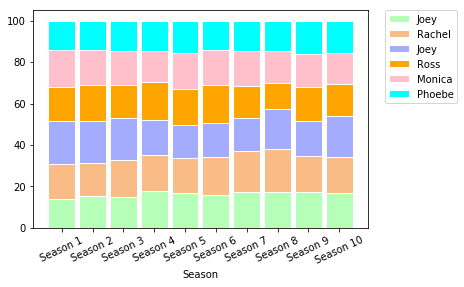

In [54]:
# plot
names = ("Season 1","Season 2","Season 3","Season 4","Season 5","Season 6","Season 7","Season 8","Season 9","Season 10")
r = np.arange(len(names))
barWidth = 0.87

plt.bar(r, joeyPer, color='#b5ffb9', edgecolor='white', width=barWidth,label="Joey")

plt.bar(r, rachelPer, bottom=joeyPer, color='#f9bc86', edgecolor='white', width=barWidth,label="Rachel")

heighPer = np.add(joeyPer,rachelPer).tolist()
plt.bar(r, rossPer, bottom=heighPer, color='#a3acff', edgecolor='white', width=barWidth,label="Joey")

heighPer = np.add(heighPer,rossPer).tolist()
plt.bar(r, chandlerPer, bottom=heighPer, color='orange', edgecolor='white', width=barWidth,label="Ross")

heighPer = np.add(heighPer,chandlerPer).tolist()
plt.bar(r, monicaPer, bottom=heighPer, color='pink', edgecolor='white', width=barWidth,label="Monica")

heighPer = np.add(heighPer,monicaPer).tolist()
plt.bar(r, phoebePer, bottom=heighPer, color='cyan', edgecolor='white', width=barWidth,label="Phoebe")

for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold') 
# Custom x axis
plt.xticks(r, names, rotation=25)
plt.xlabel("Season")
plt.ylabel("%")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
 
# Show graphic
plt.show()